<a href="https://colab.research.google.com/github/abdolhmed/Data_Acquisition_Preprocessing_CA/blob/main/MovieCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
!git clone https://github.com/abdolhmed/Data_Acquisition_Preprocessing_CA.git

Cloning into 'Data_Acquisition_Preprocessing_CA'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 208.86 KiB | 3.80 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Step 1 : Reading in [Kaggle Dataset ](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)


In [157]:
%cd Data_Acquisition_Preprocessing_CA

import pandas as pd
df = pd.read_csv("imdb_top_1000.csv")


/content/Data_Acquisition_Preprocessing_CA/Data_Acquisition_Preprocessing_CA/Data_Acquisition_Preprocessing_CA


In [158]:
df.shape

(1000, 16)

In [159]:
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


Dataset Explained
===

This dataset contains IMDBs Top 1000 movies. The movies in this dataset are ranked based off of their IMDB Rating.

Intances where the IMDB rating for more than one movie is the same, the movie with a newer released date is higher on the dataset (newer is higher ranked than older)

This dataset contains the following contents :

* Poster_Link = Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year = Year at which that movie released
* Certificate = Certificate earned by that movie
* Runtime = Total runtime of the movie
* Genre = Genre of the movie
* IMDB_Rating = Rating of the movie at IMDB site
* Overview = mini story/ summary
* Meta_score = Score earned by the movie
* Director = Name of the Director
* Star1,Star2,Star3,Star4 = Name of the Stars
* No_of_votes = Total number of votes
* Gross = Money earned by that movie
(The value reported here is near the current Domestic Box Office value as per https://www.the-numbers.com/ however the dataset was last updated 5 years ago so the values can be off in some cases)



In [160]:
df_sorted = df.sort_values(by="Gross", ascending=False)
df_sorted.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
738,https://m.media-amazon.com/images/M/MV5BOTc3Nz...,Rockstar,2011,UA,159 min,"Drama, Music, Musical",7.7,Janardhan Jakhar chases his dreams of becoming...,NaN,Imtiaz Ali,Ranbir Kapoor,Nargis Fakhri,Shammi Kapoor,Kumud Mishra,39501,"985,912"
682,https://m.media-amazon.com/images/M/MV5BZDRkOW...,The Color Purple,1985,U,154 min,Drama,7.8,A black Southern woman struggles to find her i...,78.0,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321,"98,467,863"
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
748,https://m.media-amazon.com/images/M/MV5BOGUyZD...,The Social Network,2010,UA,120 min,"Biography, Drama",7.7,As Harvard student Mark Zuckerberg creates the...,95.0,David Fincher,Jesse Eisenberg,Andrew Garfield,Justin Timberlake,Rooney Mara,624982,"96,962,694"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"


In [161]:
df["Gross"] = (
    df["Gross"]
    .replace(r'[\$,]', '', regex=True)   # remove $ and commas
    .replace('', None)                   # handle empty strings
    .astype(float)                       # convert to numeric
)

In [162]:
# Sorting the dataframe by Gross income descending to compare with complimentary dataset
df_sorted = df.sort_values(by="Gross", ascending=False)
df_sorted.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194 min,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0


# Step 2 : Web Scrape a [Complementary dataset](https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time)

Complementary Dataset Explained
===

The Numbers includes up to date data on over 50,000 movies

The part i am scraping is the all time box office records <br/>
It ranks movies by All Time Domestic Box Office (*Descending)

Including the following columns;
* Rank
* Year
* Movie
* Domestic Box Office ( US figures )
* International Box Office ( Outside of US )
* Worldwide Box Office ( Combination of both above )

This site includes 1000+ pages and 100 movies on each page.

*This site includes more up to date figures on movie income. (Gross)

*This site also includes movies released after the kaggle dataset was released.

In [149]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import time

# First page URL
base_url = "https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time"

# List of page endings i.e none,101, 201, 301 etc
page_endings = [""] + [f"/{i}" for i in range(101, 1001, 100)]

# Empty list to collect all rows
all_data = []

for i in page_endings:
    url = base_url + i # finds next page to scrape
    print(f"Scraping: {url}")

    request = urllib.request.Request( url )
    request.add_header("User-Agent", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36")
    opener = urllib.request.build_opener()
    response = opener.open(request)
    raw_html = response.read().decode("utf-8")
    soup = BeautifulSoup(raw_html, 'html.parser')

    # Find the table then its rows
    table = soup.find("table")
    rows = table.find_all("tr")

    for row in rows: # for each row find all of the table data, if there are 7 cols i.e rank, year, movie, distributor, domestic, international, worldwide collect the entries
        cols = row.find_all("td")
        if len(cols) == 7:
            rank = cols[0].text.strip()
            year = cols[1].text.strip()
            movie = cols[2].text.strip()
            distributor = cols[3].text.strip()
            domestic = cols[4].text.strip()
            international = cols[5].text.strip()
            worldwide = cols[6].text.strip()
            all_data.append([rank, year, movie, distributor, domestic, international, worldwide])

    time.sleep(5) # pauses between requests

# Creating DataFrame for scraped site
numbers_df = pd.DataFrame(all_data, columns=[
    "Rank", "Year", "Movie", "Distributor",
    "Domestic_Box_Office", "International_Box_Office", "Worldwide_Box_Office"
])

# Cleaning numeric columns
for col in ["Domestic_Box_Office", "International_Box_Office", "Worldwide_Box_Office"]:
    numbers_df[col] = (
        numbers_df[col]
        .replace(r'[\$,]', '', regex=True)
        .replace('', None)
        .astype(float)
    )

# Cleaning and convert Rank
numbers_df["Rank"] = (
    numbers_df["Rank"]
    .str.replace(',', '', regex=False)  # remove commas like '1,000'
    .astype(int)
)

# numbers_df["Rank"] = numbers_df["Rank"].astype(int)
numbers_df["Year"] = numbers_df["Year"].astype(int)



Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/101
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/201
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/301
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/401
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/501
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/601
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/701
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/801
Scraping: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-tim

In [163]:
numbers_df.head(3)

,Rank,Year,Movie,Distributor,Domestic_Box_Office,International_Box_Office,Worldwide_Box_Office
0,1,2015,Star Wars Ep. VII: The Force Awakens,Walt Disney,936662225.0,1.119385e+09,2.056047e+09
1,2,2019,Avengers: Endgame,Walt Disney,858373000.0,1.859131e+09,2.717504e+09
2,3,2021,Spider-Man: No Way Home,Sony Pict…,814811535.0,1.106395e+09,1.921207e+09


In [164]:
# creating csv
numbers_df.to_csv("scraped_box_office_full.csv", index=False)

In [165]:
# Using regex library to create a function to clean and normalise the movie titles
import re

def clean_title(title):
    if isinstance(title, str):
        title = title.lower() # removes caps
        title = re.sub(r'[^a-z0-9\s]', '', title) # Removes punctuation and special characters, leaving only letters, numbers, and spaces.
        title = re.sub(r'\s+', ' ', title).strip() # normalise spaces
        return title
    return ""

# Apply cleaning
df_sorted["clean_title"] = df_sorted["Series_Title"].apply(clean_title)
numbers_df["clean_title"] = numbers_df["Movie"].apply(clean_title)


In [166]:
df_sorted.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,clean_title
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,star wars episode vii the force awakens
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,avengers endgame
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,avatar


In [167]:
numbers_df.head(3)

,Rank,Year,Movie,Distributor,Domestic_Box_Office,International_Box_Office,Worldwide_Box_Office,clean_title
0,1,2015,Star Wars Ep. VII: The Force Awakens,Walt Disney,936662225.0,1.119385e+09,2.056047e+09,star wars ep vii the force awakens
1,2,2019,Avengers: Endgame,Walt Disney,858373000.0,1.859131e+09,2.717504e+09,avengers endgame
2,3,2021,Spider-Man: No Way Home,Sony Pict…,814811535.0,1.106395e+09,1.921207e+09,spiderman no way home


# Step 3: Merging both of the Dataframes

In [168]:
# Taking only the matching columns (based on clean title) and creating new dataframe)
merged = pd.merge(df_sorted, numbers_df, on="clean_title", how="inner" )

In [169]:
merged.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,No_of_Votes,Gross,clean_title,Rank,Year,Movie,Distributor,Domestic_Box_Office,International_Box_Office,Worldwide_Box_Office
0,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,...,809955,858373000.0,avengers endgame,2,2019,Avengers: Endgame,Walt Disney,858373000.0,1.859131e+09,2.717504e+09
1,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,...,1118998,760507625.0,avatar,4,2009,Avatar,20th Cent…,785221649.0,2.138484e+09,2.923706e+09
2,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,...,834477,678815482.0,avengers infinity war,8,2018,Avengers: Infinity War,Walt Disney,678815482.0,1.369343e+09,2.048158e+09


In [170]:
merged.to_csv("merged.csv", index=False)

In [171]:
# Checking dublicate values
duplicates = merged[merged['clean_title'].duplicated(keep= False)]
print(duplicates)

                                           Poster_Link  \
10   https://m.media-amazon.com/images/M/MV5BYTYxNG...   
11   https://m.media-amazon.com/images/M/MV5BYTYxNG...   
54   https://m.media-amazon.com/images/M/MV5BMTkxMj...   
55   https://m.media-amazon.com/images/M/MV5BMTkxMj...   
65   https://m.media-amazon.com/images/M/MV5BMzE5MD...   
66   https://m.media-amazon.com/images/M/MV5BMzE5MD...   
67   https://m.media-amazon.com/images/M/MV5BMjA5ND...   
68   https://m.media-amazon.com/images/M/MV5BMjA5ND...   
69   https://m.media-amazon.com/images/M/MV5BY2Q2ND...   
70   https://m.media-amazon.com/images/M/MV5BY2Q2ND...   
120  https://m.media-amazon.com/images/M/MV5BMjAwMT...   
121  https://m.media-amazon.com/images/M/MV5BMjAwMT...   
158  https://m.media-amazon.com/images/M/MV5BN2JlZT...   
159  https://m.media-amazon.com/images/M/MV5BN2JlZT...   

                 Series_Title Released_Year Certificate  Runtime  \
10              The Lion King          1994           U   88 

In [172]:
# Creating new column "clean key" which allows me to merge on name+year to avoid duplicate entries for movies with the same name
df_sorted["clean_key"] = df_sorted["clean_title"] + "_" + df_sorted["Released_Year"].astype(str)
numbers_df["clean_key"] = numbers_df["clean_title"] + "_" + numbers_df["Year"].astype(str)

In [173]:
# Creating new Dataframe for merged datasets
merged = pd.merge(df_sorted, numbers_df, on="clean_key", how="inner")
merged.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,clean_title_x,clean_key,Rank,Year,Movie,Distributor,Domestic_Box_Office,International_Box_Office,Worldwide_Box_Office,clean_title_y
0,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,...,avengers endgame,avengers endgame_2019,2,2019,Avengers: Endgame,Walt Disney,858373000.0,1.859131e+09,2.717504e+09,avengers endgame
1,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,...,avatar,avatar_2009,4,2009,Avatar,20th Cent…,785221649.0,2.138484e+09,2.923706e+09,avatar
2,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,...,avengers infinity war,avengers infinity war_2018,8,2018,Avengers: Infinity War,Walt Disney,678815482.0,1.369343e+09,2.048158e+09,avengers infinity war


In [126]:
merged.to_csv("mergedkey.csv", index=False)

In [127]:
# Creating Dataframe keeping only the columns i need, i wont need clean title x & clean title y etc.
final_merged = merged[["Series_Title", "Released_Year", "Certificate","Runtime","Genre","IMDB_Rating","Meta_score","Director","Star1","Star2","Star3","Star4","No_of_Votes","Gross","Rank","Distributor","Domestic_Box_Office","International_Box_Office","Worldwide_Box_Office"]]


In [128]:
final_merged.to_csv("final_merged.csv", index=False)

Merging data problem and how i addressed it
---

To merge my IMDB df and my Numbers df i first had to handle the title differences for the same movie, i.e WALL·E (IMDB) and WALL-E (the numbers), my "clean_title" function handles these cases by creating a new column in each dataset storing a normalised alternative to the titles lowering the characters,removing special characters and extra spaces. I then ran into another problem for merging based on movie titles which was when two movies have the same title, for example the lion king was released twice once in 1994 and once in 2019 this meant my program was matching info from the lion king 1994 to the lion king 2019, to overcome this i created a new column "clean key" which included the clean title and year released to further specify the movies when matching.

Clean key for lion king - the lion king_1994 and the lion king_2019


I then merged both datasets by "inner" on the "clean_key" which meant i was only keeping rows where clean_key from both my IMDB df and my Numbers df matched leaving any other row out.

I then created a final_merged df which got rid of repitive columns like title of mive and unnecessary columns like link to poster


# Step 4: Explore / visualise

In [129]:
!pip install seaborn

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

For the income of movies i wont have any movies that made less than 75082668.0 as previously mentioned Thenumbers website ranks their movies by domestic box office and i scraped 10 of their pages to get 1000 movies, 183 matched and the lowest income match was 75082668.0, it should be noted if i scrapped more pages i may have gotten more matches and lower gross income.

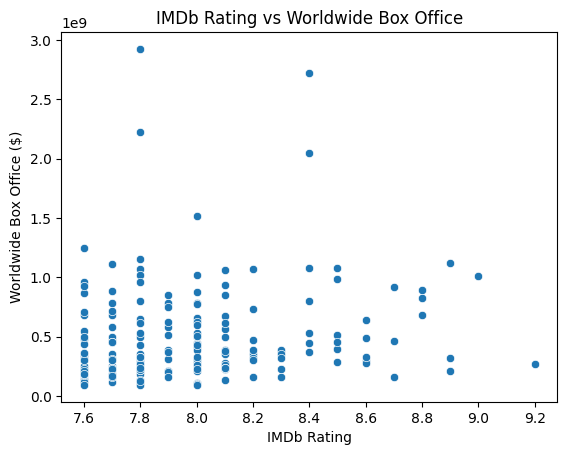

In [131]:
# Checking if IMDb rating is correlated to world wide gross income, i.e if higher rating means higher income
sns.scatterplot(
    data=final_merged,
    x="IMDB_Rating",
    y="Worldwide_Box_Office",
)
plt.title("IMDb Rating vs Worldwide Box Office")
plt.xlabel("IMDb Rating")
plt.ylabel("Worldwide Box Office ($)")
plt.show()

# Result : The scatterplot shows imdb ratings and worldwide income is uncorrelated, some movies may have a high imdb rating and lower income


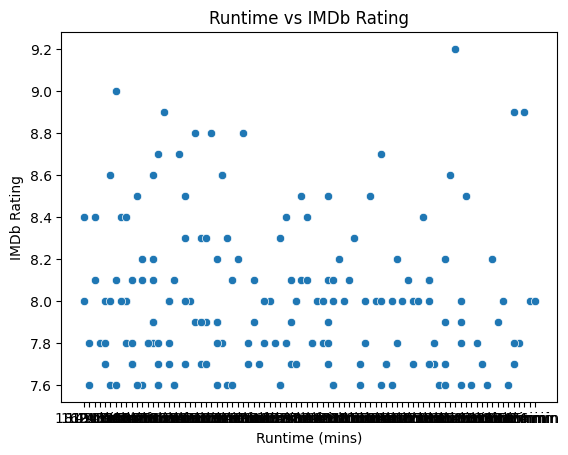

In [132]:
# checking to see if run time is correlated to IMDb ratings.
sns.scatterplot(
    data=final_merged,
    x="Runtime",
    y="IMDB_Rating",
)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (mins)")
plt.ylabel("IMDb Rating")
plt.show()
# Result : There is a very slight correlation, the longer the movies the higher the rating

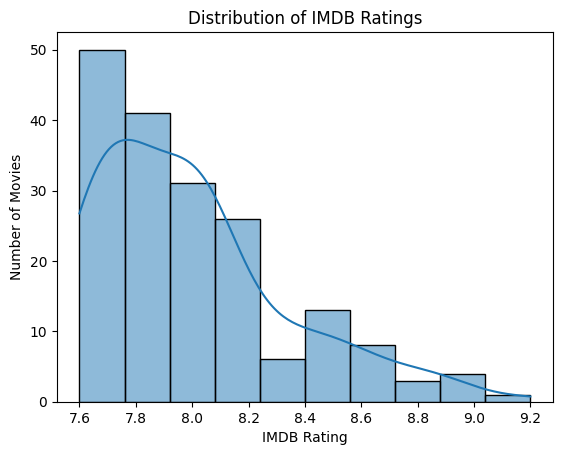

In [133]:
# checking the distribution of runtimes for movies
sns.histplot(final_merged["IMDB_Rating"], bins=10, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.show()
# Result : most movies are rated from 7.6 to 7.8

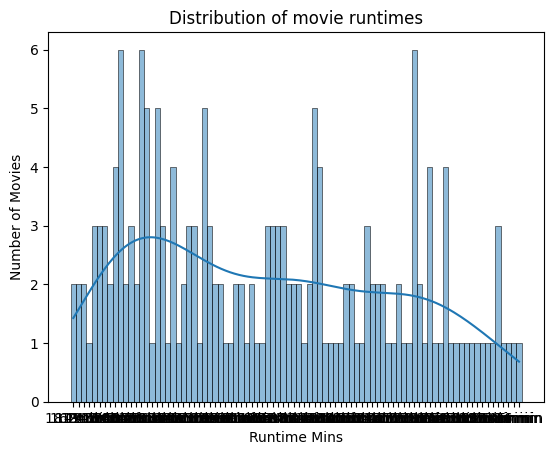

In [134]:
sns.histplot(final_merged["Runtime"], bins=10, kde=True)
plt.title("Distribution of movie runtimes")
plt.xlabel("Runtime Mins")
plt.ylabel("Number of Movies")
plt.show()

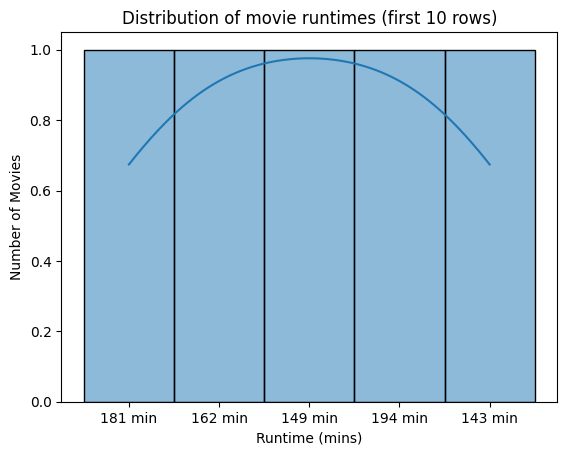

In [135]:
sns.histplot(final_merged["Runtime"].head(5), bins=10, kde=True)
plt.title("Distribution of movie runtimes (first 10 rows)")
plt.xlabel("Runtime (mins)")
plt.ylabel("Number of Movies")
plt.show()


In [136]:
# trouble shooting to figure out what value is stored in the x axis ( the runtime )
type(final_merged["Runtime"].iloc[0])
# found it was a string


str

In [137]:
# removing "mins" and converting runtime to an integer
final_merged["Runtime"] = final_merged["Runtime"].str.replace("min", "").astype(int)

/tmp/ipython-input-2537697292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged["Runtime"] = final_merged["Runtime"].str.replace("min", "").astype(int)


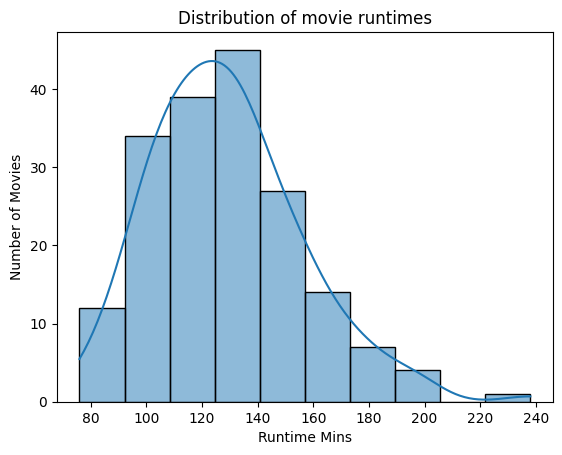

In [138]:
# can now display histogram to show the distribution of movie runtimes
sns.histplot(final_merged["Runtime"], bins=10, kde=True)
plt.title("Distribution of movie runtimes")
plt.xlabel("Runtime Mins")
plt.ylabel("Number of Movies")
plt.show()
# Result : most movies lay around 130mins

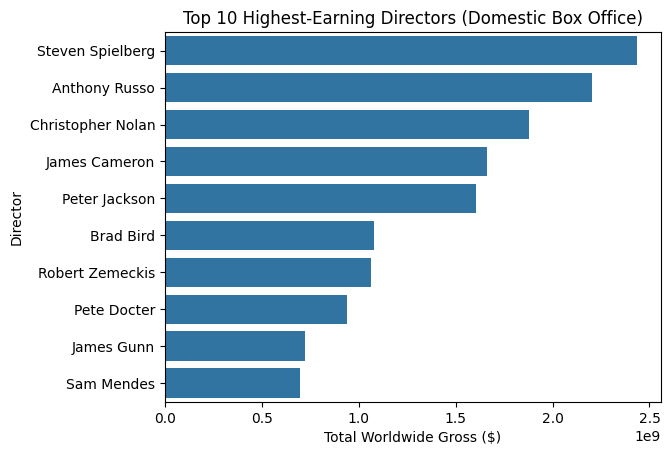

In [139]:
# who are the highest earning directors (top 10 by domestic box office)
director_earnings_domestic = (
    final_merged.groupby("Director")["Domestic_Box_Office"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=director_earnings_domestic, x="Domestic_Box_Office", y="Director")
plt.title("Top 10 Highest-Earning Directors (Domestic Box Office)")
plt.xlabel("Total Worldwide Gross ($)")
plt.ylabel("Director")
plt.show()


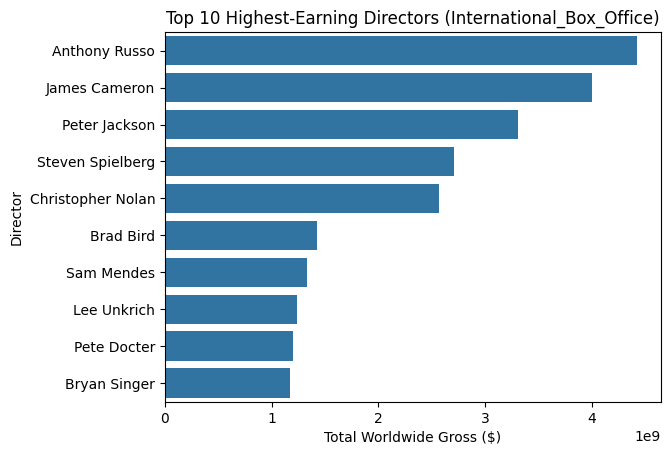

In [140]:
# who are the highest earning directors (top 10 by international box office)
director_earnings_international = (
    final_merged.groupby("Director")["International_Box_Office"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=director_earnings_international, x="International_Box_Office", y="Director")
plt.title("Top 10 Highest-Earning Directors (International_Box_Office)")
plt.xlabel("Total Worldwide Gross ($)")
plt.ylabel("Director")
plt.show()

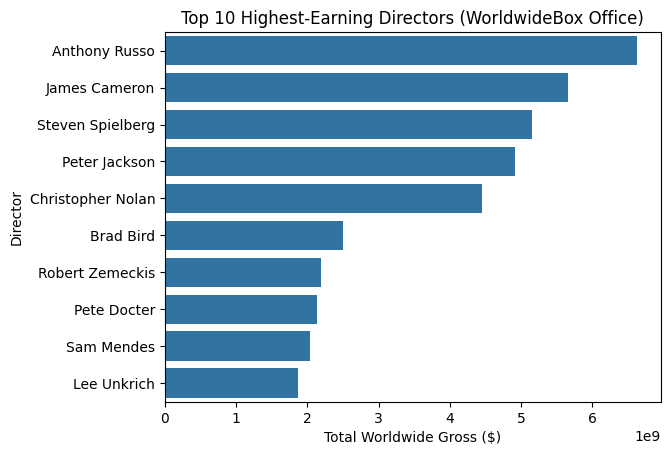

In [141]:
# who are the highest earning directors (top 10 by Worldwide box office)
director_earnings_Worldwide = (
    final_merged.groupby("Director")["Worldwide_Box_Office"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=director_earnings_Worldwide, x="Worldwide_Box_Office", y="Director")
plt.title("Top 10 Highest-Earning Directors (WorldwideBox Office)")
plt.xlabel("Total Worldwide Gross ($)")
plt.ylabel("Director")
plt.show()

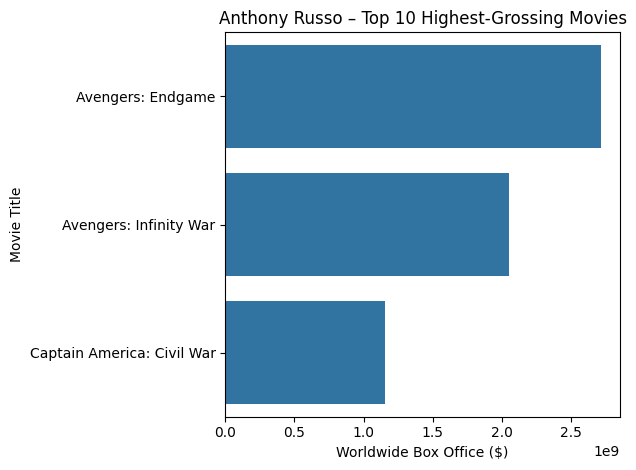

In [142]:
# what are anthony russos top three movies, and how much did they earn ( Worldwide )
russo_df = final_merged[final_merged["Director"] == "Anthony Russo"]

russo_top10 = russo_df.sort_values(
    by="Worldwide_Box_Office",
    ascending=False
).head(3)

sns.barplot(data=russo_top10, x="Worldwide_Box_Office", y="Series_Title")
plt.title("Anthony Russo – Top 10 Highest-Grossing Movies")
plt.xlabel("Worldwide Box Office ($)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

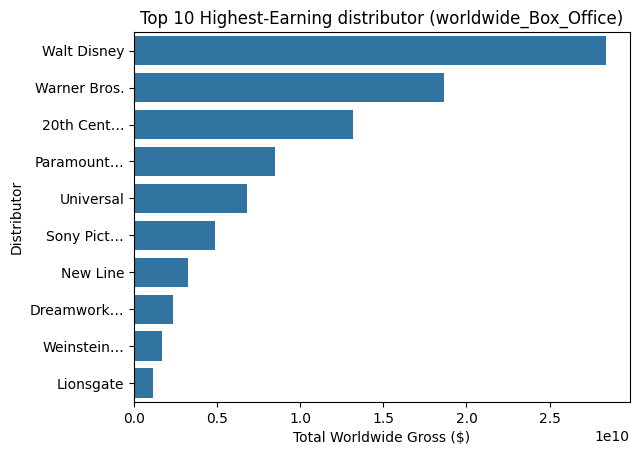

In [143]:
# who are the highest earning distributors (worldwide)
distributor_earnings_Worldwide = (
    final_merged.groupby("Distributor")["Worldwide_Box_Office"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=distributor_earnings_Worldwide, x="Worldwide_Box_Office", y="Distributor")
plt.title("Top 10 Highest-Earning distributor (worldwide_Box_Office)")
plt.xlabel("Total Worldwide Gross ($)")
plt.ylabel("Distributor")
plt.show()

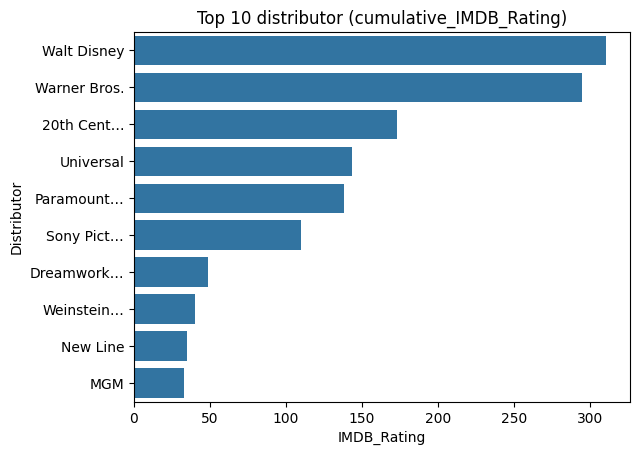

In [144]:
# who are the top 10 distributors by cumulative IMDb ratings
distributor_IMDB_Rating = (
    final_merged.groupby("Distributor")["IMDB_Rating"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=distributor_IMDB_Rating, x="IMDB_Rating", y="Distributor")
plt.title("Top 10 distributor (cumulative_IMDB_Rating)")
plt.xlabel("IMDB_Rating")
plt.ylabel("Distributor")
plt.show()

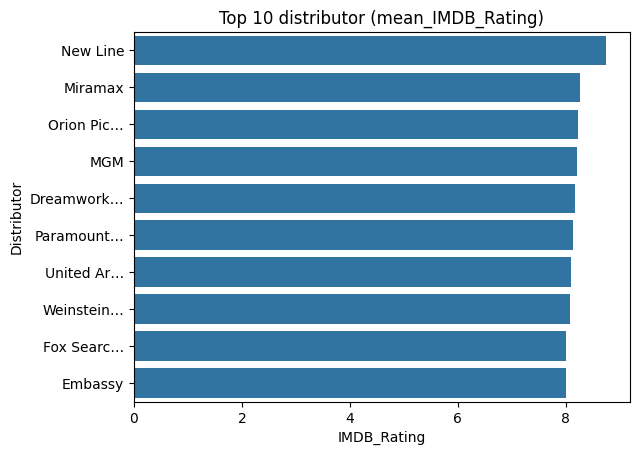

In [145]:
# who are the top distributors by mean imdb ratings
distributor_IMDB_Rating = (
    final_merged.groupby("Distributor")["IMDB_Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(data=distributor_IMDB_Rating, x="IMDB_Rating", y="Distributor")
plt.title("Top 10 distributor (mean_IMDB_Rating)")
plt.xlabel("IMDB_Rating")
plt.ylabel("Distributor")
plt.show()

# This is a better represantation as in cumulative it includes a bias for whichever distributor released more movies

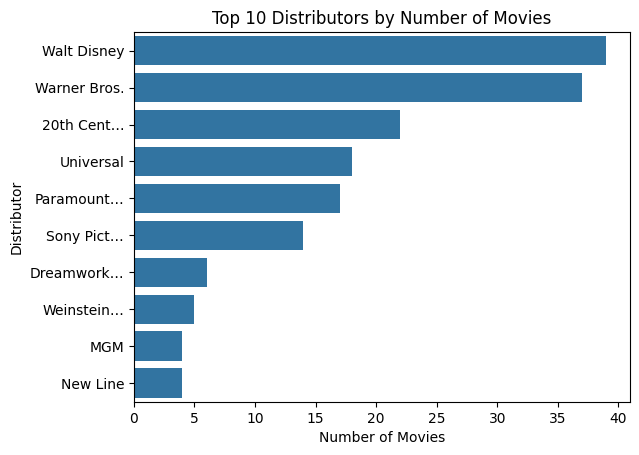

In [146]:
# assures my argument of frequency bias
# create series of distributors and the number of times they appear
distributor_counts = final_merged["Distributor"].value_counts().head(10)
sns.barplot(
    x=distributor_counts.values,
    y=distributor_counts.index
)

plt.title("Top 10 Distributors by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Distributor")
plt.show()


In [147]:
distributor_counts

,count
Distributor,
Walt Disney,39
Warner Bros.,37
20th Cent…,22
Universal,18
Paramount…,17
Sony Pict…,14
Dreamwork…,6
Weinstein…,5
MGM,4
